使用 SHAP 解釋線性邏輯回歸情感分析模型的簡單範例。


我們使用的數據集是這篇論文中經典的 IMDB 數據集。在解釋模型時，觀察到一個有趣的現象，即文本中缺失的詞語有時與那些出現在文本中的詞語一樣重要。

In [1]:
! pip install shap

In [2]:
import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import shap
shap.initjs()
np.random.seed(101)

# Load the IMDB dataset

In [3]:
corpus, y = shap.datasets.imdb()
corpus

["Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.\n",
 "Airport '77 starts as a brand new luxury 747 plane is loaded up with valuable paintings & such belonging to rich businessman Philip Stevens (James Stewart) who is flying them & a bunch of VIP's to his estate in preparation of it being opened to the public as a museum, also on board is Stevens daughter Julie (Kathleen Quinlan) & her so

In [4]:
y

array([False, False, False, ...,  True,  True,  True])

In [5]:
corpus_train, corpus_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=42)

# TF-IDF
vectorizer = TfidfVectorizer(min_df=10)
X_train = vectorizer.fit_transform(corpus_train).toarray()
X_test = vectorizer.transform(corpus_test).toarray()

In [6]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Fit a linear logistic regression model

In [7]:
model = sklearn.linear_model.LogisticRegression(
    penalty="l2", # penalty="l2"：使用 L2 正則化來防止過擬合。
    C=0.1)    # C=0.1：正則化強度的倒數，值越小正則化越強。
model.fit(X_train, y_train)
classification_report(y_test, model.predict(X_test))

'              precision    recall  f1-score   support\n\n       False       0.84      0.84      0.84      2426\n        True       0.85      0.85      0.85      2574\n\n    accuracy                           0.85      5000\n   macro avg       0.85      0.85      0.85      5000\nweighted avg       0.85      0.85      0.85      5000\n'

# Explain the linear model

In [8]:
explainer = shap.Explainer(model, X_train, feature_names=vectorizer.get_feature_names_out())
shap_values = explainer(X_test)

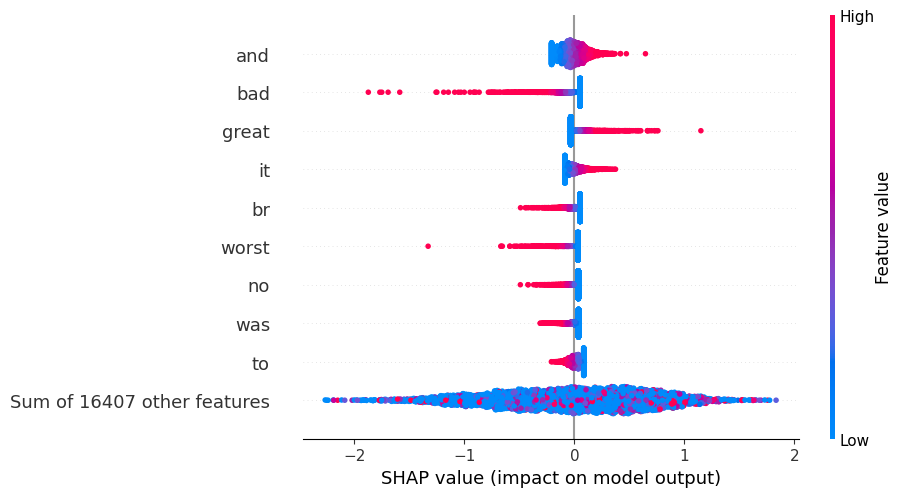

In [9]:
# Summary plots
shap.plots.beeswarm(shap_values)

**1.   "great" 和 "worst"**
*   "great" 的 SHAP 值主要是正的，紅色為主，表明 "great" 這個詞在高特徵值下對模型輸出有正面影響（可能在情感分析中，與正面評價相關）。
*   "worst" 的 SHAP 值主要是負的，且主要集中於紅色，表示這個詞對模型輸出有明顯的負面影響。


**2.   "bad"**
*   SHAP 值主要是負的，並且集中於紅色點，這表明 "bad" 這個特徵對模型輸出有負向影響。

**3.   "and"、"it"、"to" 等非情感相關的詞**
*   這些詞的 SHAP 值接近於 0，顯示這些詞對模型輸出的影響較小，可能是因為它們是常見詞，對情感表達沒有直接的關聯性。

**4.   尾部特徵 (Sum of 16407 other features)**
*   長尾特徵的 SHAP 值接近 0，表示這些特徵對模型輸出的影響可以忽略。


In [10]:
# Explain the first review’s sentiment prediction
ind = 0
shap.plots.force(shap_values[ind])

In [11]:
print("Positive" if y_test[ind] else "Negative", "Review:")
print(corpus_test[ind])

Positive Review:
"Twelve Monkeys" is odd and disturbing, yet being so clever and intelligent at the same time. It cleverly jumps between future and the past, and the story it tells is about a man named James Cole, a convict, who is sent back to the past to gather information about a man-made virus that wiped out 5 billion of the human population on the planet back in 1996. At first Cole is sent back to the year 1990 by accident and by misfortune he is taken to a mental institution where he tries to explain his purpose and where he meets a psychiatrist Dr. Kathryn Railly who tries to help him and a patient named Jeffrey Goines, the insane son of a famous scientist. Being provocative and somehow so sensible, dealing with and between reason and madness, the movie is a definite masterpiece in the history of science-fiction films.<br /><br />The story is just fantastic. It's so original and so entertaining. The screenplay itself written by David and Janet Peoples is inspired by a movie name

In [12]:
# Explain the second review’s sentiment prediction
ind = 1
shap.plots.force(shap_values[ind])

In [13]:
print("Positive" if y_test[ind] else "Negative", "Review:")
print(corpus_test[ind])

Negative Review:
I don't understand the positive comments made about this film. It is cheap and nasty on all levels and I cannot understand how it ever got made.<br /><br />Cartoon characters abound - Sue's foul-mouthed, alcoholic, layabout, Irish father being a prime example. None of the characters are remotely sympathetic - except, briefly, for Sue's Asian boyfriend but even he then turns out to be capable of domestic violence! As desperately unattractive as they both are, I've no idea why either Rita and/or Sue would throw themselves at a consummate creep like Bob - but given that they do, why should I be expected to care what happens to them? So many reviews keep carping on about how "realistic" it is. If that is true, it is a sad reflection on society but no reason to put it on film.<br /><br />I didn't like the film at all.



https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Sentiment%20Analysis%20with%20Logistic%20Regression.html